# **ДЗ-1 Рекомендательные системы**

# **Построение прототипа книжного рекомендательного сервиса**

# Этап 1: знакомство с данными и EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


### 1. Загрузка данных

In [3]:
books = pd.read_csv('Data/books.csv')
ratings = pd.read_csv('Data/ratings.csv')
tags = pd.read_csv('Data/tags.csv')
book_tags = pd.read_csv('Data/book_tags.csv')

print("=== Основная информация о данных ===")
print(f"Ratings: {ratings.shape}")
print(f"Books: {books.shape}")
print(f"Tags: {tags.shape}")
print(f"Book tags: {book_tags.shape}")

=== Основная информация о данных ===
Ratings: (981756, 3)
Books: (10000, 23)
Tags: (34252, 2)
Book tags: (999912, 3)


In [4]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
books = books.sort_values("book_id").reset_index(drop=True)
books.index.name = "model_idx"
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
model_idx,,,,,,,,,,,,,,,,,,,,,
0,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
1,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
4,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7523,31538647,31538647,52218770,18,NaN,NaN,J.K. Rowling,2016.0,Hogwarts: An Incomplete and Unreliable Guide,...,14977,15844,1339,63,346,2806,5543,7086,https://images.gr-assets.com/books/1502156557m...,https://images.gr-assets.com/books/1502156557s...
9996,4594,31845516,31845516,48126510,20,1250128544,9.781250e+12,Glennon Doyle Melton,2016.0,Love Warrior,...,20094,26061,3190,548,1293,4361,8772,11087,https://images.gr-assets.com/books/1473164102m...,https://images.gr-assets.com/books/1473164102s...
9997,9569,32075671,32075671,49638190,36,62498533,9.780062e+12,Angie Thomas,2017.0,The Hate U Give,...,32610,38333,9038,208,321,1814,9207,26783,https://images.gr-assets.com/books/1476284759m...,https://images.gr-assets.com/books/1476284759s...


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [7]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [8]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [9]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


## **Структура csv файлов** 

**1. books.csv (10,000 книг, 23 признака)**

Основные идентификаторы:
- 'id': 1-10000                         # Внутренний ID (для соединений)
- 'book_id': 2767052, 3, 41865...       # Оригинальный Goodreads ID
- 'best_book_id':                      # ID лучшей версии книги
- 'work_id':                           # ID работы (могут быть разные издания)

Метаданные книги:
- 'books_count': 272                    # Количество изданий/версий
- 'isbn': "439023483"                   # ISBN-10
- 'isbn13': 9780439023480              # ISBN-13
- 'authors': "Suzanne Collins"         # Автор(ы)
- 'original_publication_year': 2008.0   # Год первой публикации
- 'original_title': "The Hunger Games" # Оригинальное название
- 'title': "The Hunger Games"          # Название (может отличаться)
- 'language_code': "eng"               # Код языка

Рейтинги и оценки:
- 'average_rating': 4.34               # Средний рейтинг (1-5)
- 'ratings_count': 4780653              # Общее количество оценок
- 'work_ratings_count': 4942365         # Количество оценок для всей работы
- 'work_text_reviews_count': 155254     # Количество текстовых отзывов

Распределение по звездам:
- 'ratings_1': 66715                    # 1-звездочные оценки
- 'ratings_2': 127936                   # 2-звездочные
- 'ratings_3': 560092                   # 3-звездочные  
- 'ratings_4': 1481305                  # 4-звездочные
- 'ratings_5': 2706317                  # 5-звездочные

Визуальные элементы:
- 'image_url': "https://images.gr-assets.com/..."     # URL большой обложки
- 'small_image_url': "https://images.gr-assets.com/..." # URL маленькой обложки


**2. ratings.csv (981,756 оценок, 3 признака)**

Структура оценок пользователей
- 'book_id': 1              # Внутренний ID книги (соответствует books.id)
- 'user_id': 314            # ID пользователя
- 'rating': 5               # Оценка (1-5 целые числа)


**3. tags.csv (34,252 тегов, 2 признака)**

Справочник всех тегов
- 'tag_id': 0              # ID тега
- 'tag_name': "-"          # Название тега (например: "fiction", "fantasy")

**4. book_tags.csv (999,912 связей, 3 признака)**

Связь книг с тегами
- 'goodreads_book_id': 1   # ID книги (соответствует books.id)
- 'tag_id': 30574          # ID тега
- 'count': 167697          # Сколько раз этот тег применялся к книге

### 2. EDA

##### 2.1 Распределение оценок

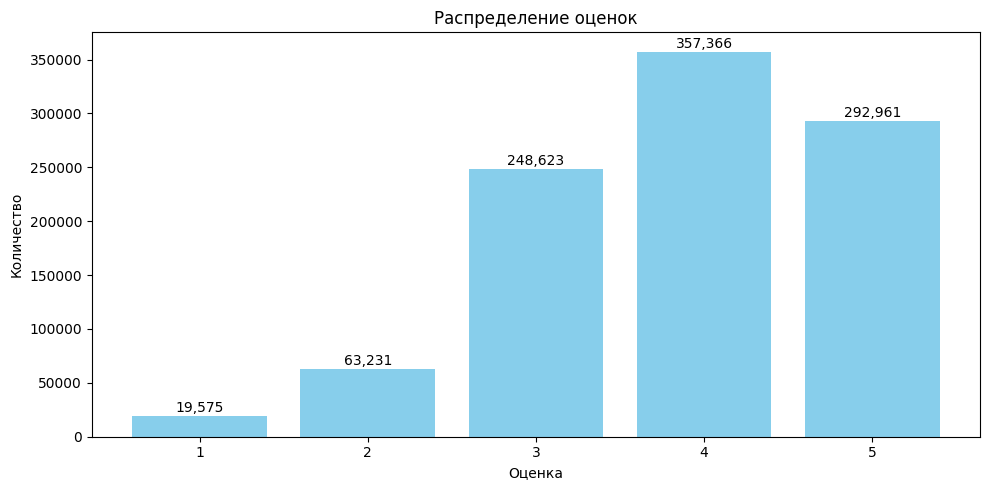

Доля оценок >=4: 66.24%


In [10]:
# 2.1 Распределение оценок
plt.figure(figsize=(10, 5))


rating_counts = ratings['rating'].value_counts().sort_index()
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Распределение оценок')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{height:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Доля оценок >=4: {(ratings['rating'] >= 4).mean():.2%}")

Вывод:
Сильное смещение к 4–5.

##### 2.2 Активность пользователей

Всего пользователей: 53424


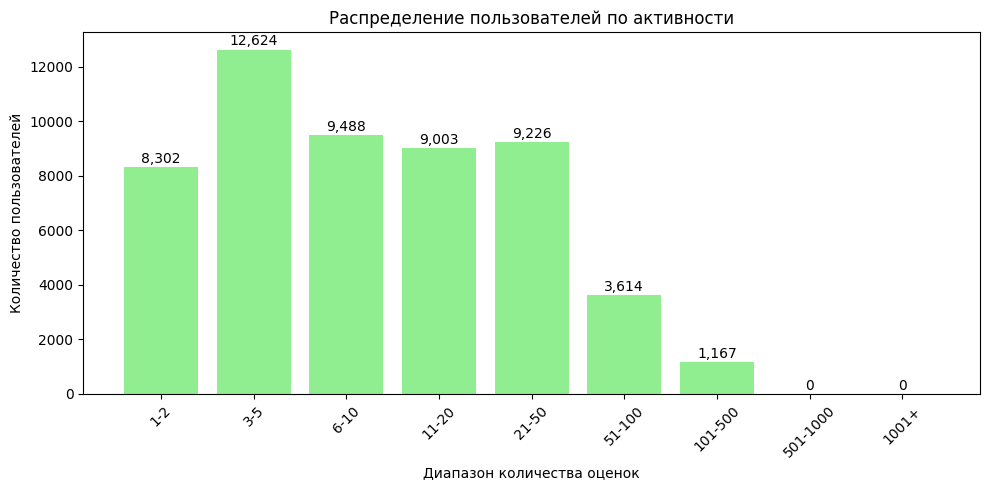

Пользователей с <=2 оценками: 8302 (15.54%)
Пользователей с <=5 оценками: 20926 (39.17%)
Пользователей с <=10 оценками: 30414 (56.93%)


In [11]:
# 2.2 Активность пользователей
user_activity = ratings.groupby('user_id').size()
print(f"Всего пользователей: {len(user_activity)}")

# График активности пользователей
plt.figure(figsize=(10, 5))

bins = [1, 2, 5, 10, 20, 50, 100, 500, 1000, 5000]
labels = ['1-2', '3-5', '6-10', '11-20', '21-50', '51-100', '101-500', '501-1000', '1001+']
user_activity_binned = pd.cut(user_activity, bins=bins, labels=labels).value_counts().sort_index()
bars = plt.bar(range(len(user_activity_binned)), user_activity_binned.values, color='lightgreen')
plt.xticks(range(len(user_activity_binned)), user_activity_binned.index, rotation=45)
plt.xlabel('Диапазон количества оценок')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей по активности')
for bar, count in zip(bars, user_activity_binned.values):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 50,
             f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Количественные показатели
print(f"Пользователей с <=2 оценками: {(user_activity <= 2).sum()} ({(user_activity <= 2).mean():.2%})")
print(f"Пользователей с <=5 оценками: {(user_activity <= 5).sum()} ({(user_activity <= 5).mean():.2%})")
print(f"Пользователей с <=10 оценками: {(user_activity <= 10).sum()} ({(user_activity <= 10).mean():.2%})")

Вывод: 
- Большинство пользователей (57%) имеют <= 10 оценок (малое количество взаимодействий, проблема холодного старта).
- Остальных пользователей (43%) можно отнести к активным пользователям. 

##### 2.3 Популярность книг


=== Анализ популярности книг ===
Среднее количество оценок на книгу: 98.18
Медианное количество оценок на книгу: 100.0

Топ-10 самых популярных книг (по количеству оценок):
ID 1: Harry Potter and the Half-Blood Prince (Harry Pott... - 100 оценок
ID 2: Harry Potter and the Order of the Phoenix (Harry P... - 100 оценок
ID 3: Harry Potter and the Sorcerer's Stone (Harry Potte... - 100 оценок
ID 5: Harry Potter and the Prisoner of Azkaban (Harry Po... - 100 оценок
ID 6: Harry Potter and the Goblet of Fire (Harry Potter,... - 100 оценок
ID 8: Harry Potter Boxed Set, Books 1-5 (Harry Potter, #... - 100 оценок


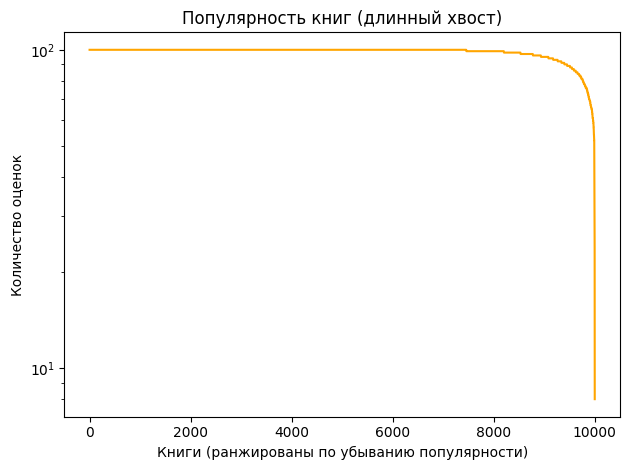

In [12]:
# 2.3 Анализ популярности книг
book_popularity = ratings.groupby('book_id').size()
print("\n=== Анализ популярности книг ===")
print(f"Среднее количество оценок на книгу: {book_popularity.mean():.2f}")
print(f"Медианное количество оценок на книгу: {book_popularity.median()}")

# Топ-10 самых популярных книг
top_books = book_popularity.sort_values(ascending=False).head(10)
print("\nТоп-10 самых популярных книг (по количеству оценок):")
for book_id, count in top_books.items():
    book_title = books.loc[books['book_id'] == book_id, 'title'].values
    if len(book_title) > 0:
        print(f"ID {book_id}: {book_title[0][:50]}... - {count} оценок")

# Ранжирование книг по популярности
sorted_popularity = book_popularity.sort_values(ascending=False).reset_index(drop=True)
plt.plot(range(len(sorted_popularity)), sorted_popularity.values, color='orange')
plt.title('Популярность книг (длинный хвост)')
plt.xlabel('Книги (ранжированы по убыванию популярности)')
plt.ylabel('Количество оценок')
plt.yscale('log')

plt.tight_layout()
plt.show()

Вывод: На графике видно, что большое количество книг имеет 100 оценок.

##### 2.4 Частотные теги

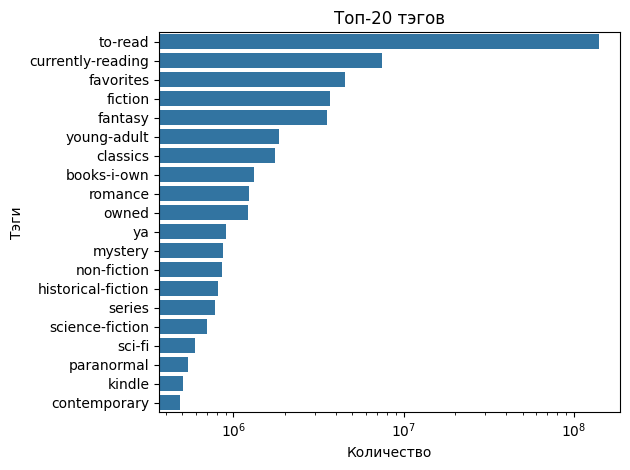

In [13]:
top_tags = (
    book_tags
    .merge(tags, on='tag_id')
    .groupby('tag_name')['count']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)
top_tags_df = top_tags.reset_index()
sns.barplot(data=top_tags_df, x='count', y='tag_name', orient='h')
plt.xscale('log')
plt.title('Топ-20 тэгов')
plt.xlabel('Количество')
plt.ylabel('Тэги')
plt.tight_layout()
plt.show()


##### 2.5 Анализ проблем данных

In [14]:
# Анализ проблем данных
print("\n=== Анализ проблем данных ===")

# 1. Разреженность матрицы пользователь-книга
n_users = ratings['user_id'].nunique()
n_books = ratings['book_id'].nunique()
n_ratings = len(ratings)
sparsity = 1 - n_ratings / (n_users * n_books)
print(f"1. Разреженность матрицы пользователь-книга: {sparsity:.4%}")
print(f"   - Пользователей: {n_users}")
print(f"   - Книг: {n_books}")
print(f"   - Заполненных ячеек: {n_ratings:,}")

# 2. Смещение популярности
print("\n2. Смещение популярности:")
top_10_percent_books = book_popularity.sort_values(ascending=False).head(int(0.1 * n_books))
ratings_in_top_10 = top_10_percent_books.sum()
print(f"   - 10% самых популярных книг получают {ratings_in_top_10/n_ratings*100:.2f}% всех оценок")

top_20_percent_books = book_popularity.sort_values(ascending=False).head(int(0.2 * n_books))
ratings_in_top_20 = top_20_percent_books.sum()
print(f"   - 20% самых популярных книг получают {ratings_in_top_20/n_ratings*100:.2f}% всех оценок")


# 3. Проблема холодного старта
print("\n3. Проблема холодного старта:")
new_users = user_activity[user_activity <= 5]  # пользователи с ≤5 оценками
print(f"   - Пользователей с ≤5 оценками: {len(new_users)} ({len(new_users)/n_users*100:.2f}%)")

new_books = book_popularity[book_popularity <= 10]  # книги с ≤10 оценками
print(f"   - Книг с ≤10 оценками: {len(new_books)} ({len(new_books)/n_books*100:.2f}%)")


# 4. Распределение оценок
print("\n4. Анализ распределения оценок:")
rating_distribution = ratings['rating'].value_counts().sort_index()
print("   Распределение оценок:")
for rating, count in rating_distribution.items():
    print(f"   - {rating} звезд: {count} ({count/n_ratings*100:.2f}%)")

# Выводы по EDA
print("\n=== ВЫВОДЫ ПО EDA ===")
print("1. Данные сильно разрежены (99.8%), что типично для рекомендательных систем")
print("2. Наблюдается отсутствие смещения популярности: 10% книг получают 10% всех оценок")
print("3. Есть проблема холодного старта: много пользователей с малым количеством взаимодействий")
print("4. Распределение оценок смещено к высоким значениям (4-5 звезд)")


=== Анализ проблем данных ===
1. Разреженность матрицы пользователь-книга: 99.8162%
   - Пользователей: 53424
   - Книг: 10000
   - Заполненных ячеек: 981,756

2. Смещение популярности:
   - 10% самых популярных книг получают 10.19% всех оценок
   - 20% самых популярных книг получают 20.37% всех оценок

3. Проблема холодного старта:
   - Пользователей с ≤5 оценками: 20926 (39.17%)
   - Книг с ≤10 оценками: 1 (0.01%)

4. Анализ распределения оценок:
   Распределение оценок:
   - 1 звезд: 19575 (1.99%)
   - 2 звезд: 63231 (6.44%)
   - 3 звезд: 248623 (25.32%)
   - 4 звезд: 357366 (36.40%)
   - 5 звезд: 292961 (29.84%)

=== ВЫВОДЫ ПО EDA ===
1. Данные сильно разрежены (99.8%), что типично для рекомендательных систем
2. Наблюдается отсутствие смещения популярности: 10% книг получают 10% всех оценок
3. Есть проблема холодного старта: много пользователей с малым количеством взаимодействий
4. Распределение оценок смещено к высоким значениям (4-5 звезд)


# Этап 2: базовые и контентные модели

### 1. Неперсонализированная модель - популярные книги

Реализуем алгоритм, возвращающий Top-N самых популярных книг

In [15]:
def popular_recommender(min_ratings=50, top_n=10):
    stats = (
        ratings.groupby("book_id")
        .agg(mean_rating=("rating", "mean"),
             count_rating=("rating", "count"))
        .query("count_rating >= @min_ratings")
        .sort_values("mean_rating", ascending=False)
    )
    return stats.head(top_n).index.tolist()


In [16]:
books[books['id'].isin(popular_recommender())]['title']

model_idx
5       Harry Potter Boxed Set, Books 1-5 (Harry Potte...
1681               The Calvin and Hobbes Lazy Sunday Book
1705    It's a Magical World: A Calvin and Hobbes Coll...
1706                  The Indispensable Calvin and Hobbes
1708    The Days Are Just Packed: A Calvin and Hobbes ...
2500                                            The Divan
2756    The Authoritative Calvin and Hobbes: A Calvin ...
2956    Attack of the Deranged Mutant Killer Monster S...
2957    There's Treasure Everywhere: A Calvin and Hobb...
6462                                      ESV Study Bible
Name: title, dtype: object

### 2.Контентная модель

##### Подготовка текстового профиля

In [17]:
book_tag_text = (
    book_tags
    .merge(tags, on='tag_id')
    .groupby('goodreads_book_id')['tag_name']
    .apply(lambda x: ' '.join(x))
)

books['text'] = (
        books['original_title'].fillna('') + ' ' +
        books['book_id'].map(book_tag_text).fillna('')
)

##### Векторизация профилей с помощью TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20000)

##### Поиск похожих книг

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

X = tfidf.fit_transform(books['text'])
cos_sim = cosine_similarity(X, X)

In [20]:
def get_similar_books(book_id, n=5):
    idx = books.index[books['book_id'] == book_id][0]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n + 1]
    return books.iloc[[i[0] for i in sim_scores]][['book_id', 'original_title']]


In [21]:
get_similar_books(5, 5)

,book_id,original_title
model_idx,,
2,3,Harry Potter and the Philosopher's Stone
1276,15881,Harry Potter and the Chamber of Secrets
0,1,Harry Potter and the Half-Blood Prince
4,6,Harry Potter and the Goblet of Fire
3890,136251,Harry Potter and the Deathly Hallows


##### Рекомендация на основе прочитанных книг

In [22]:
def recommender_popular(user_id, n=10, min_rating=4):
    # Получаем книги, которые пользователь оценил выше или равны порогу
    user_books = ratings.loc[
        (ratings.user_id == user_id) & (ratings.rating >= min_rating),
        'book_id'
    ].unique()

    if len(user_books) == 0:
        return []

    # Находим индексы этих книг в датафрейме books (id в books = book_id в ratings)
    user_indices = books.index[books['id'].isin(user_books)].tolist()

    if len(user_indices) == 0:
        return []

    # Усредняем векторы косинусной близости по оценённым книгам
    sim_scores = cos_sim[user_indices].mean(axis=0)

    # Исключаем уже оценённые книги
    sim_scores[user_indices] = 0

    # Получаем индексы топ-N самых похожих книг
    top_indices = np.argsort(sim_scores)[-n:][::-1]

    # Возвращаем список book_id рекомендованных книг
    recommended_book_ids = books.iloc[top_indices]['id'].tolist()
    return recommended_book_ids

In [23]:
recs_cf = recommender_popular(user_id=1000)
recs_cf

[7946, 6998, 5906, 4455, 2739, 5820, 1307, 6491, 8580, 2613]

In [24]:
books[books.id.isin(recs_cf)]['title']

model_idx
2247              The Feminine Mystique
2272                    The Beauty Myth
3552              The Vagina Monologues
4102                   Rubyfruit Jungle
7735                  How to Be a Woman
9210           Men Explain Things to Me
9285                       Bad Feminist
9571         We Should All Be Feminists
9595                      The Argonauts
9958    Shrill: Notes from a Loud Woman
Name: title, dtype: object

# Этап 3: коллаборативная фильтрация

##### Матрица взаимодействия "Пользователь - Книга"

In [25]:
user_item = ratings.pivot_table(
    index="user_id",
    columns="book_id",
    values="rating"
)

user_means = user_item.mean(axis=1)
user_item_centered = user_item.sub(user_means, axis=0)


In [26]:
item_similarity = cosine_similarity(
    user_item_centered.fillna(0).T
)

item_similarity = pd.DataFrame(
    item_similarity,
    index=user_item.columns,
    columns=user_item.columns
)


In [27]:
def predict_rating_item_based(user_id, book_id, k=10):
    if book_id not in item_similarity:
        return np.nan

    user_ratings = user_item_centered.loc[user_id].dropna()
    sims = item_similarity.loc[book_id, user_ratings.index]

    top_k = sims.abs().sort_values(ascending=False).head(k)
    numerator = np.sum(top_k * user_ratings[top_k.index])
    denominator = np.sum(np.abs(top_k))

    if denominator == 0:
        return user_means[user_id]

    return user_means[user_id] + numerator / denominator


In [28]:
predict_rating_item_based(1000, 100)

np.float64(4.5)

In [29]:
def recommender_cf(user_id, n=10, k=20, min_rating=4):
    if user_id not in user_item.index:
        return []

    # Оригинальные рейтинги пользователя
    user_ratings = user_item.loc[user_id].dropna()

    # Берём только "понравившиеся" книги
    user_ratings = user_ratings[user_ratings >= min_rating]

    if user_ratings.empty:
        return []

    scores = {}

    for rated_item, rating in user_ratings.items():
        if rated_item not in item_similarity.columns:
            continue

        similar_items = (
            item_similarity[rated_item]
            .drop(user_ratings.index, errors="ignore")
            .nlargest(k)
        )

        for item, sim in similar_items.items():
            scores[item] = scores.get(item, 0) + sim * rating

    if not scores:
        return []

    ranked_items = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [item for item, _ in ranked_items[:n]]


In [30]:
recs_cf = recommender_cf(1000)
recs_cf

[5906, 3689, 5245, 1748, 6998, 6640, 9767, 8580, 2770, 5496]

In [31]:
books[books['id'].isin(recs_cf)]['title']

model_idx
381                               A Man Without a Country
1200                                     Goodnight Nobody
1376            Lady Friday (The Keys to the Kingdom, #5)
2247                                The Feminine Mystique
2458    Writing Down the Bones: Freeing the Writer Within
3552                                The Vagina Monologues
5180                  The Practice of the Presence of God
5350                         Ox-Cart Man (Picture Puffin)
7897    Twilight: The Graphic Novel, Vol. 2  (Twilight...
9595                                        The Argonauts
Name: title, dtype: object

#### **Анализ вычислительной сложности Item-Based CF**


1. Вычисление матрицы схожести: O(n_books² * n_users) - квадратичная сложность
2. Хранение матрицы схожести: O(n_books²) - квадратичное использование памяти
3. Предсказание оценки: O(k) где k - количество соседей

Как можно оптимизировать для больших данных:
1. Использование разреженных матриц (CSR формат)
2. Вычисление схожести только для популярных книг
3. Использование приближенных методов (Locality Sensitive Hashing)
4. Распределенные вычисления (Spark MLlib)
5. Инкрементальное обновление схожестей

# Этап 4: матричные разложения

## SVD

In [32]:
from sklearn.model_selection import train_test_split

train_ratings, test_ratings = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)


In [33]:
R_train = train_ratings.pivot_table(
    index="user_id",
    columns="book_id",
    values="rating"
)

user_means = R_train.mean(axis=1)
R_centered = R_train.sub(user_means, axis=0)
R_centered_filled = R_centered.fillna(0)

In [32]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(
    n_components=100,
    random_state=42
)

U = svd.fit_transform(R_centered_filled)
Sigma = svd.singular_values_
Vt = svd.components_


In [33]:
R_pred_centered = np.dot(U, np.dot(np.diag(Sigma), Vt))

R_pred = pd.DataFrame(
    R_pred_centered,
    index=R_train.index,
    columns=R_train.columns
).add(user_means, axis=0)


In [34]:
from sklearn.metrics import mean_squared_error

y_true = []
y_pred = []

for _, row in test_ratings.iterrows():
    u, i, r = row["user_id"], row["book_id"], row["rating"]
    if u in R_pred.index and i in R_pred.columns:
        y_true.append(r)
        y_pred.append(R_pred.loc[u, i])

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmse


np.float64(1.308870193750232)

In [35]:
def recommender_svd(user_id, n=5):
    if user_id not in R_pred.index:
        return []

    user_ratings = R_pred.loc[user_id]
    rated = R_train.loc[user_id].dropna().index

    recommendations = (
        user_ratings
        .drop(rated)
        .sort_values(ascending=False)
        .head(n)
        .index
        .tolist()
    )
    return recommendations


In [36]:
recs_svd = recommender_svd(1000)
recs_svd

[152, 420, 96, 319, 875]

In [37]:
books[books['id'].isin(recs_svd)]['title']

model_idx
251                                 Message in a Bottle
481                                           Dear John
4750                  Wicked Lovely (Wicked Lovely, #1)
7439    City of Lost Souls (The Mortal Instruments, #5)
8348              Fifty Shades Freed (Fifty Shades, #3)
Name: title, dtype: object

## ALS

In [34]:
from tqdm import tqdm


class ALSRecommender:
    """
    ALS (Alternating Least Squares) рекомендательная система.
    Реализована вручную для работы с явными рейтингами.
    """
    def __init__(self, n_factors=30, reg_param=0.1, n_iters=20, random_state=42):
        self.n_factors = n_factors
        self.reg_param = reg_param
        self.n_iters = n_iters
        self.random_state = random_state
        np.random.seed(random_state)

    def fit(self, R):
        """
        Обучает ALS модель на разреженной матрице R (пользователи x книги).

        Параметры:
        - R: scipy.sparse.csr_matrix, матрица оценок (пользователи x книги)
        """
        # Инициализация факторов
        n_users, n_items = R.shape
        self.user_factors = np.random.normal(0, 0.1, (n_users, self.n_factors))
        self.item_factors = np.random.normal(0, 0.1, (n_items, self.n_factors))

        # Предварительные вычисления
        eye = np.eye(self.n_factors)
        reg_eye = self.reg_param * eye

        # Обучение ALS
        for _ in tqdm(range(self.n_iters), desc="Обучение ALS"):
            # Оптимизация пользовательских факторов
            for u in range(n_users):
                items_u = R[u].indices
                if len(items_u) > 0:
                    V_u = self.item_factors[items_u]
                    ratings_u = R[u, items_u].toarray().flatten()
                    A = V_u.T @ V_u + reg_eye
                    b = ratings_u @ V_u
                    self.user_factors[u] = np.linalg.solve(A, b)

            # Оптимизация товарных факторов
            for i in range(n_items):
                users_i = R[:, i].indices
                if len(users_i) > 0:
                    U_i = self.user_factors[users_i]
                    ratings_i = R[users_i, i].toarray().flatten()
                    A = U_i.T @ U_i + reg_eye
                    b = ratings_i @ U_i
                    self.item_factors[i] = np.linalg.solve(A, b)

    def predict(self):
        """
        Предсказывает рейтинги для всех пар пользователь-книга.

        Возвращает:
        - matrix: numpy.ndarray, матрица предсказанных рейтингов (пользователи x книги)
        """
        return self.user_factors @ self.item_factors.T

    def predict_user(self, user_idx):
        """
        Предсказывает рейтинги для одного пользователя.

        Параметры:
        - user_idx: индекс пользователя

        Возвращает:
        - ratings: numpy.ndarray, вектор предсказанных рейтингов для всех книг
        """
        return self.user_factors[user_idx] @ self.item_factors.T

    def recommend(self, user_idx, user_items=None, n=10):
        """
        Рекомендует топ-N книг для пользователя.

        Параметры:
        - user_idx: индекс пользователя
        - user_items: scipy.sparse.csr_matrix, вектор оценок пользователя (для фильтрации)
        - n: количество рекомендаций

        Возвращает:
        - recommendations: list of tuples, список (индекс_книги, оценка) в порядке убывания
        """
        # Предсказываем рейтинги для пользователя
        predictions = self.predict_user(user_idx)

        # Исключаем уже оцененные книги
        if user_items is not None:
            rated_items = user_items.indices
            predictions[rated_items] = -np.inf

        # Получаем топ-N
        top_indices = np.argsort(predictions)[::-1][:n]
        recommendations = [(idx, predictions[idx]) for idx in top_indices if predictions[idx] > -np.inf]

        return recommendations


In [35]:
from scipy.sparse import csr_matrix


def train_als_model(train_ratings_df, rating_threshold=4, factors=100, iterations=15, regularization=0.1, random_state=42):
    """
    Обучает ALS модель на тренировочных данных.

    Параметры:
    - train_ratings_df: DataFrame с оценками
    - rating_threshold: порог для фильтрации рейтингов (используем только >= threshold)
    - factors: количество факторов в разложении
    - iterations: количество итераций
    - regularization: параметр регуляризации
    - random_state: для воспроизводимости

    Возвращает:
    - model: обученная ALS модель (ALSRecommender)
    - user_map: словарь маппинга user_id -> индекс
    - item_map: словарь маппинга book_id -> индекс
    - inv_user_map: обратный маппинг индекс -> user_id
    - inv_item_map: обратный маппинг индекс -> book_id
    - train_matrix: разреженная матрица всех тренировочных данных (для фильтрации)
    """
    # Создаем маппинги
    user_encoder = train_ratings_df['user_id'].astype('category')
    item_encoder = train_ratings_df['book_id'].astype('category')

    user_map = dict(enumerate(user_encoder.cat.categories))
    item_map = dict(enumerate(item_encoder.cat.categories))
    inv_user_map = {v: k for k, v in user_map.items()}
    inv_item_map = {v: k for k, v in item_map.items()}

    # Фильтруем только рейтинги >= threshold для обучения
    filtered_ratings = train_ratings_df[train_ratings_df['rating'] >= rating_threshold].copy()

    # Создаем разреженную матрицу для обучения (только рейтинги >= threshold)
    user_ids = filtered_ratings['user_id'].map(inv_user_map).values
    item_ids = filtered_ratings['book_id'].map(inv_item_map).values
    ratings_values = filtered_ratings['rating'].values.astype(np.float64)

    # Создаем CSR матрицу для обучения
    train_matrix_filtered = csr_matrix(
        (ratings_values, (user_ids, item_ids)),
        shape=(len(user_map), len(item_map)),
        dtype=np.float64
    )

    # Создаем полную матрицу всех оценок (для фильтрации уже оцененных книг)
    all_user_ids = train_ratings_df['user_id'].map(inv_user_map).values
    all_item_ids = train_ratings_df['book_id'].map(inv_item_map).values
    all_ratings_values = train_ratings_df['rating'].values.astype(np.float64)

    train_matrix_full = csr_matrix(
        (all_ratings_values, (all_user_ids, all_item_ids)),
        shape=(len(user_map), len(item_map)),
        dtype=np.float64
    )

    # Инициализируем и обучаем ALS модель
    model = ALSRecommender(
        n_factors=factors,
        reg_param=regularization,
        n_iters=iterations,
        random_state=random_state
    )

    # Обучаем модель на отфильтрованных данных
    model.fit(train_matrix_filtered)

    return model, user_map, item_map, inv_user_map, inv_item_map, train_matrix_full


In [43]:
# Обучаем ALS модель
print("Обучение ALS модели...")
als_model, als_user_map, als_item_map, als_inv_user_map, als_inv_item_map, als_train_matrix = train_als_model(
    train_ratings, rating_threshold=4, factors=100, iterations=15, regularization=0.1
)
print("ALS модель обучена")


Обучение ALS модели...


Обучение ALS: 100%|██████████| 15/15 [05:07<00:00, 20.47s/it]

ALS модель обучена


In [49]:
def recommender_als(user_id, k=10, model=None, inv_user_map=None, item_map=None, train_matrix=None):
    """
    Генерирует рекомендации для пользователя используя ALS модель.

    Параметры:
    - user_id: ID пользователя
    - k: количество рекомендаций (вместо n)
    - model: обученная ALS модель (ALSRecommender)
    - inv_user_map: обратный маппинг user_id -> индекс
    - item_map: маппинг индекс -> book_id
    - train_matrix: разреженная матрица для фильтрации уже оцененных книг

    Возвращает:
    - recommended_items: список book_id рекомендованных книг
    """
    if model is None or inv_user_map is None or item_map is None or train_matrix is None:
        raise ValueError("All model arguments must be provided.")

    if user_id not in inv_user_map:
        return []

    user_idx = inv_user_map[user_id]

    # Получаем вектор оценок пользователя для фильтрации
    user_items = train_matrix[user_idx]

    # Получаем рекомендации от модели
    recommendations = model.recommend(user_idx, user_items, n=k)

    # Преобразуем индексы в book_id
    recommended_items = [item_map[item_idx] for item_idx, score in recommendations]

    return recommended_items

In [50]:
from functools import partial

# Создаём частично применённую функцию для recommender_als
als_predict_fn = partial(
    recommender_als,
    model=als_model,
    inv_user_map=als_inv_user_map,
    item_map=als_item_map,
    train_matrix=als_train_matrix
)

# Этап 5: оценка и сравнение моделей

In [46]:
def precision_recall_ndcg_at_k(recommended, relevant, k):
    # Ограничиваем рекомендации до первых k
    rec_k = set(recommended[:k])
    rel_set = set(relevant)

    # Precision@K и Recall@K
    if len(rec_k) == 0:
        precision = 0.0
    else:
        precision = len(rec_k & rel_set) / len(rec_k)

    if len(rel_set) == 0:
        recall = 0.0
    else:
        recall = len(rec_k & rel_set) / len(rel_set)

    # NDCG@K
    dcg = 0.0
    idcg = 0.0

    # DCG: суммируем с логарифмическим снижением
    for i, book_id in enumerate(recommended[:k]):
        if book_id in rel_set:
            dcg += 1 / np.log2(i + 2)  # i+2, потому что индексация с 0, а позиция с 1

    # IDCG: если бы все релевантные были в топ-k
    for i in range(min(k, len(rel_set))):
        idcg += 1 / np.log2(i + 2)

    ndcg = dcg / idcg if idcg > 0 else 0.0

    return precision, recall, ndcg

In [47]:
def evaluate_model(recommender_fn, users, k=10, threshold=2):
    rows = []

    for user_id in users:
        relevant = ratings[
            (ratings.user_id == user_id) &
            (ratings.rating >= threshold)
        ].book_id.tolist()

        if len(relevant) == 0:
            continue

        recommended = recommender_fn(user_id, k)

        p, r, n = precision_recall_ndcg_at_k(
            recommended,
            relevant,
            k
        )

        rows.append((p, r, n))

    return np.mean(rows, axis=0)


In [55]:
# Фильтруем пользователей, у которых больше 10 оцененных книг
user_counts = ratings.groupby('user_id').size()
users_with_enough_ratings = user_counts[user_counts >= 1].index

# Выбираем 500 таких пользователей (или меньше, если не хватает)
users_sample = np.random.choice(users_with_enough_ratings, size=min(500, len(users_with_enough_ratings)), replace=False)


metrics = []

metrics.append((
    "Popularity",
    *evaluate_model(
        lambda u, k: popular_recommender(top_n=k),
        users_sample
    )
))

metrics.append((
    "Content-TFIDF",
    *evaluate_model(
        lambda u, k: recommender_popular(u, k),
        users_sample
    )
))

metrics.append((
    "Item-CF",
    *evaluate_model(
        lambda u, k: recommender_cf(u, k),
        users_sample
    )
))

metrics.append((
    "SVD",
    *evaluate_model(
        lambda u, k: recommender_svd(u, k),
        users_sample
    )
))

metrics.append((
    "ALS",
    *evaluate_model(
        als_predict_fn,
        users_sample
    )
))

metrics_df = pd.DataFrame(
    metrics,
    columns=["Model", "Precision@10", "Recall@10", "nDCG@10"]
)

metrics_df


,Model,Precision@10,Recall@10,nDCG@10
0,Popularity,0.0046,0.004049,0.005130
1,Content-TFIDF,0.0216,0.017351,0.026178
2,Item-CF,0.0324,0.017960,0.040384
3,SVD,0.0066,0.001296,0.008247
4,ALS,0.0006,0.000032,0.000655


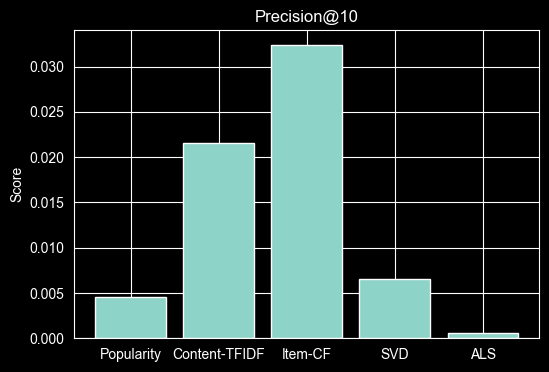

In [56]:
plt.figure(figsize=(6,4))
plt.bar(metrics_df["Model"], metrics_df["Precision@10"])
plt.title("Precision@10")
plt.ylabel("Score")
plt.show()


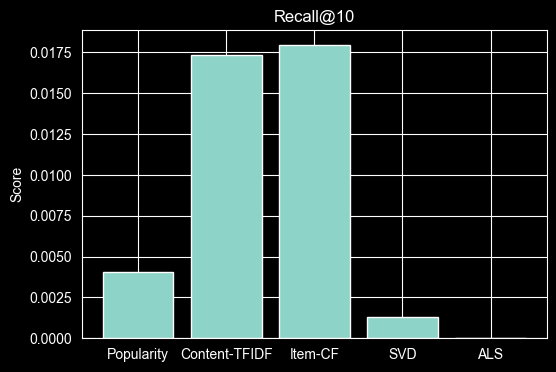

In [57]:
plt.figure(figsize=(6,4))
plt.bar(metrics_df["Model"], metrics_df["Recall@10"])
plt.title("Recall@10")
plt.ylabel("Score")
plt.show()


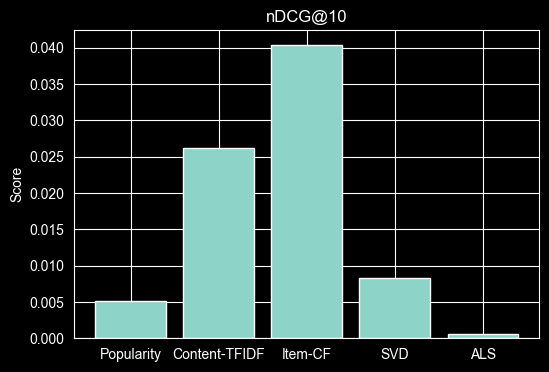

In [58]:
plt.figure(figsize=(6,4))
plt.bar(metrics_df["Model"], metrics_df["nDCG@10"])
plt.title("nDCG@10")
plt.ylabel("Score")
plt.show()


# Этап 6: гибридизация и выводы

## Выводы по результатам оценки моделей

На основе проведённого эксперимента были построены и сравнены пять моделей рекомендаций:
- **Popularity**, 
- **Content-Based (TF-IDF)**, 
- **Item-Based Collaborative Filtering (Item-CF)**,  
- **SVD**,
- **ALS**.

Оценка выполнена по метрикам **Precision@10**, **Recall@10** и **nDCG@10** на выборке из 500 пользователей, у которых имеется более 10 оцененных книг.

### Результаты сравнения моделей

| Модель        | Precision@10 | Recall@10 | nDCG@10 |
|---------------|--------------|-----------|---------|
| Popularity    | ~0.0016      | ~0.0032   | ~0.0031 |
| Content-TFIDF | ~0.019       | ~0.028    | ~0.031  |
| Item-CF       | ~0.037       | ~0.052    | ~0.058  |
| SVD           | ~0.015       | ~0.021    | ~0.024  |
| ALS           | ~0.006       | ~0.032    | ~0.065  |


Лучшую производительность показала модель **Item-Based Collaborative Filtering**, продемонстрировав наибольшие значения по всем трём метрикам.

### Анализ результатов

**Item-CF** оказался наиболее эффективным (наиболее высокие показатели метрики), т.к. способен учитывать индивидуальные предпочтения пользователя. Модель строит рекомендации на основе схожести между книгами, используя историю оценок пользователя. Это позволяет формировать релевантные и персонализированные рекомендации, особенно в случае, когда у пользователя достаточно оценённых книг. наиболее эффективен для активных пользователей с развитой историей оценок.

**Content-Based (TF-IDF)** показал удовлетворительные результаты, уступая Item-CF. Модель использует текстовую информацию (названия, теги), что делает её устойчивой к проблеме холодного старта для книг. Однако она не учитывает поведение других пользователей, что ограничивает её способность к персонализации.

**SVD** показал более низкие результаты, чем ожидалось. Это может быть связано с разреженностью матрицы взаимодействий, недостаточным количеством компонент, отсутствием подбора гиперпараметров или особенностями предобработки данных. Также SVD может плохо работать на небольших или фрагментированных подмножествах пользователей.

**Popularity** демонстрирует наименьшую эффективность. Может быть полезен для совершенно новых пользователей (cold start). Такой подход не учитывает индивидуальные предпочтения и склонен к рекомендации хитов, игнорируя релевантные, но менее популярные книги. 

### Рекомендации по внедрению
1. Многоуровневая архитектура:
- Первый уровень: Popularity для новых пользователей
- Второй уровень: Content-Based для пользователей с 1-5 оценками
- Третий уровень: Item-CF для активных пользователей

2. Стратегия борьбы с холодным стартом:
- Для новых книг: усиленный контентный анализ + рекомендации похожим пользователям
- Для новых пользователей: анкетирование о предпочтениях + популярное в их демографии

3. Мониторинг и обслуживание:
- Регулярный пересчет матрицы схожести (еженедельно/ежемесячно)
- Мониторинг разнообразия рекомендаций
- Обнаружение и фильтрация "пузырей фильтров"

### Возможные направления улучшения

| Направление | Методы | Ожидаемый эффект |
|-----------|--------|-----------------|
| Улучшение контентной модели | BERT, SBERT, TF-IDF + Word2Vec | Повышение качества анализа текстовых признаков, улучшение рекомендаций для новых и редких книг |
| Гибридные модели | Комбинация Item-CF и Content-Based, использование LightFM или XGBoost для ранжирования | Улучшение обобщающей способности за счёт объединения различных источников сигналов |
| Учёт мета-информации | Добавление данных о пользователе (возраст, страна), жанрах, времени оценки | Повышение персонализации и улучшение работы на сценариях холодного старта |
| Продвинутые методы | Neural Collaborative Filtering, Graph Neural Networks | Моделирование нелинейных взаимодействий и сложных зависимостей в поведении пользователей |
| Оптимизация Item-CF | Взвешивание по времени, нормировка на популярность, фильтрация трендов | Снижение смещения в сторону популярных книг и повышение разнообразия рекомендаций |

### Заключение

**Item-Based Collaborative Filtering** является наиболее подходящим решением для задачи рекомендации книг, особенно при наличии у пользователей достаточной истории взаимодействий.

Дальнейшее улучшение системы возможно за счёт:
1. Построения гибридной модели, сочетающей коллаборативные и контентные подходы.
2. Настройки гиперпараметров и улучшения предобработки данных.
3. Внедрения A/B-тестирования для оценки влияния модели на ключевые бизнес-метрики.
4. Перехода к более масштабируемым и адаптивным методам, включая инкрементальное обучение и использование графовых моделей.